# Potato Disease Classification

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 2 1 0 1 0 1 1 2 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1]


In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[146. 148. 161.]
  [144. 146. 159.]
  [143. 145. 158.]
  ...
  [138. 134. 148.]
  [135. 131. 146.]
  [131. 127. 142.]]

 [[146. 148. 161.]
  [143. 145. 158.]
  [141. 143. 156.]
  ...
  [126. 122. 136.]
  [143. 139. 154.]
  [135. 131. 146.]]

 [[146. 148. 161.]
  [144. 146. 159.]
  [142. 144. 157.]
  ...
  [134. 130. 144.]
  [144. 140. 155.]
  [118. 114. 129.]]

 ...

 [[197. 196. 202.]
  [193. 192. 198.]
  [188. 187. 193.]
  ...
  [134. 127. 134.]
  [166. 159. 166.]
  [177. 170. 177.]]

 [[196. 195. 201.]
  [193. 192. 198.]
  [188. 187. 193.]
  ...
  [159. 152. 159.]
  [155. 148. 155.]
  [172. 165. 172.]]

 [[191. 190. 196.]
  [189. 188. 194.]
  [185. 184. 190.]
  ...
  [180. 173. 180.]
  [148. 141. 148.]
  [176. 169. 176.]]]


In [8]:
 for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


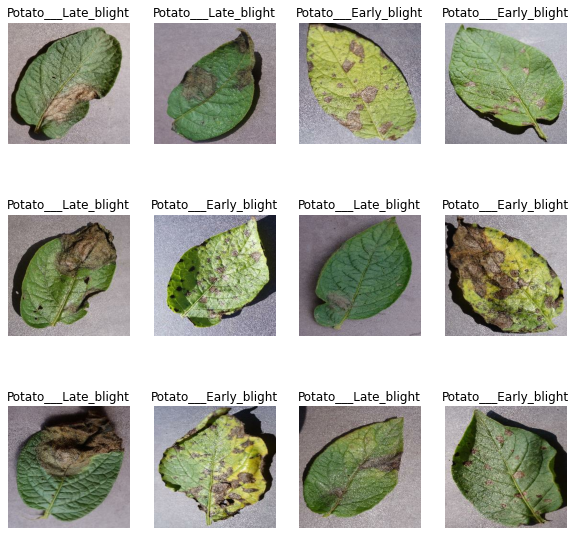

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [10]:
len(dataset)

68

In [11]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [12]:
train_ds = dataset.take(54)
len(train_ds)

54

In [13]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [14]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [15]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [16]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [21]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])